# ND - Shapefile Generation using MAUP
@author: Pedro Pinheiro

Citation: This notebook contain a lot of copy/edit/paste from the 'IL_MAUP.ipynb' seen in class.

All data retrieved 03/25/24: <br>
    [North Dakota block PL 94-171 2020 (by table)](https://redistrictingdatahub.org/dataset/north-dakota-block-pl-94171-2020-by-table/) <br>
    [VEST 2020 North Dakota precinct and election results](https://redistrictingdatahub.org/dataset/vest-2020-north-dakota-precinct-boundaries-and-election-results/) <br>
    [2021 North Dakota State Senate Approved Plan](https://redistrictingdatahub.org/dataset/2021-north-dakota-state-senate-approved-plan/)

Data available at Google Drive:
https://drive.google.com/drive/folders/1085mysytFWZk2IDfG791PgdrA2BJjkrM?usp=sharing

##### Import Libraries

In [1]:
import geopandas as gpd
import maup
import time

In [2]:
maup.progress.enabled = True

## Import and Explore the Data
First let's import 2 dataframes from the Census Shapefiles.

[https://www2.census.gov/programs-surveys/decennial/2020/technical-documentation/complete-tech-docs/summary-file/2020Census_PL94_171Redistricting_StatesTechDoc_English.pdf](https://www2.census.gov/programs-surveys/decennial/2020/technical-documentation/complete-tech-docs/summary-file/2020Census_PL94_171Redistricting_StatesTechDoc_English.pdf)

In [3]:
start_time = time.time()
population_df = gpd.read_file("./nd_pl2020_b/nd_pl2020_p1_b.shp")
end_time = time.time()
print("The time to import nd_pl2020_p1_b.shp is:",
      (end_time-start_time)/60, "mins")

The time to import nd_pl2020_p1_b.shp is: 2.236809317270915 mins


First file (P2) contatins information about total population with Hispanic and Non-Hispanic details.

In [4]:
start_time = time.time()
hisp_population_df = gpd.read_file("./nd_pl2020_b/nd_pl2020_p2_b.shp")
end_time = time.time()
print("The time to import nd_pl2020_p2_b.shp is:",
      (end_time-start_time)/60, "mins")

The time to import nd_pl2020_p2_b.shp is: 2.3310253739356996 mins


Second file (P4) contains information about the VAP (Voting age popilation) with Hispanic and non-Hispanic details.

In [5]:
start_time = time.time()
vap_df= gpd.read_file("./nd_pl2020_b/nd_pl2020_p3_b.shp")
end_time = time.time()
print("The time to import nd_pl2020_p3_b.shp is:",
      (end_time-start_time)/60, "mins")

The time to import nd_pl2020_p3_b.shp is: 2.277017064889272 mins


The next dataframe will contain information about the 2020 election result by precint

In [6]:
start_time = time.time()
hisp_vap_df= gpd.read_file("./nd_pl2020_b/nd_pl2020_p4_b.shp")
end_time = time.time()
print("The time to import nd_pl2020_p4_b.shp is:",
      (end_time-start_time)/60, "mins")

The time to import nd_pl2020_p4_b.shp is: 2.3714719851811727 mins


In [7]:
start_time = time.time()
election_df = gpd.read_file("./nd_vest_20/nd_vest_20.shp")
end_time = time.time()
print("The time to import nd_vest_20.shp is:",
      (end_time-start_time)/60, "mins")

The time to import nd_vest_20.shp is: 0.006658633550008138 mins


Finally, the last dataframe will contain information about the approved congressional districts.

In [8]:
start_time = time.time()
sldu_2021_df = gpd.read_file("./nd_sldu_adopted_2021/nd_sldu_adopted_2021.shp")
end_time = time.time()
print("The time to import nd_sldu_adopted_2021.shp is:",
      (end_time-start_time)/60, "mins")

The time to import nd_sldu_adopted_2021.shp is: 0.005031569798787435 mins


In [9]:
start_time = time.time()
sldu_2024_df = gpd.read_file("./nd_sldu_adopted_2024/nd_sldu_adopted_2024.shp")
end_time = time.time()
print("The time to import nd_sldu_adopted_2024.shp is:",
      (end_time-start_time)/60, "mins")

The time to import nd_sldu_adopted_2024.shp is: 0.001540191968282064 mins


In [10]:
start_time = time.time()
sldl_2021_df = gpd.read_file("./nd_sldl_adopted_2021/FinalShape1282021 2021-12-08.shp")
end_time = time.time()
print("The time to import FinalShape1282021 2021-12-08.shp is:",
      (end_time-start_time)/60, "mins")

The time to import FinalShape1282021 2021-12-08.shp is: 0.0018881797790527345 mins


In [11]:
start_time = time.time()
sldl_2024_df = gpd.read_file("./nd_sldl_adopted_2024/CourtOrdered 2024-01-19.shp")
end_time = time.time()
print("The time to import CourtOrdered 2024-01-19.shp is:",
      (end_time-start_time)/60, "mins")

The time to import CourtOrdered 2024-01-19.shp is: 0.0018977602322896323 mins


We can check that we have the 17 expected districts for PA, since we have 17 rows on the last dataframe:

In [12]:
print(sldu_2021_df.shape)
print(sldu_2024_df.shape)
print(sldl_2021_df.shape)
print(sldl_2024_df.shape)

(47, 2)
(47, 2)
(49, 12)
(48, 20)


We check the name of all the columns for the dataframe.

In [13]:
print(population_df.columns)
print(hisp_population_df.columns)
print(vap_df.columns)
print(hisp_vap_df.columns)

Index(['GEOID20', 'SUMLEV', 'LOGRECNO', 'GEOID', 'COUNTY', 'P0010001',
       'P0010002', 'P0010003', 'P0010004', 'P0010005', 'P0010006', 'P0010007',
       'P0010008', 'P0010009', 'P0010010', 'P0010011', 'P0010012', 'P0010013',
       'P0010014', 'P0010015', 'P0010016', 'P0010017', 'P0010018', 'P0010019',
       'P0010020', 'P0010021', 'P0010022', 'P0010023', 'P0010024', 'P0010025',
       'P0010026', 'P0010027', 'P0010028', 'P0010029', 'P0010030', 'P0010031',
       'P0010032', 'P0010033', 'P0010034', 'P0010035', 'P0010036', 'P0010037',
       'P0010038', 'P0010039', 'P0010040', 'P0010041', 'P0010042', 'P0010043',
       'P0010044', 'P0010045', 'P0010046', 'P0010047', 'P0010048', 'P0010049',
       'P0010050', 'P0010051', 'P0010052', 'P0010053', 'P0010054', 'P0010055',
       'P0010056', 'P0010057', 'P0010058', 'P0010059', 'P0010060', 'P0010061',
       'P0010062', 'P0010063', 'P0010064', 'P0010065', 'P0010066', 'P0010067',
       'P0010068', 'P0010069', 'P0010070', 'P0010071', 'geom

As we can see below, the cong_df dataframe has a DISTRICT column which indicates the district for each defined geometry

In [14]:
print(population_df["P0010001"].sum())
print(hisp_population_df["P0020001"].sum())
print(vap_df["P0030001"].sum())
print(hisp_vap_df["P0040001"].sum())

779094
779094
596093
596093


In [15]:
population_df_rename = {'COUNTY': 'COUNTY20', 'P0010001': 'TOTPOP', 'P0010003': 'P_WHITE', 'P0010004': 'P_BLACK', 'P0010005': 'P_AMIN',
                        'P0010006': 'P_ASIAN', 'P0010007': 'P_NHPI', 'P0010008': 'P_OTHER', 'P0010009': 'P_2MORE'}

hisp_population_df_rename = {'P0020002': 'HISP', 'P0020005': 'NH_WHITE', 'P0020006': 'NH_BLACK', 'P0020007': 'NH_AMIN',
                             'P0020008': 'NH_ASIAN', 'P0020009': 'NH_NHPI', 'P0020010': 'NH_OTHER', 'P0020011': 'NH_2MORE'}

vap_df_rename = {'P0030001': 'VAP', 'P0030003': 'WVAP', 'P0030004': 'BVAP', 'P0030005': 'AMINVAP',
                 'P0030006': 'ASIANVAP', 'P0030007': 'NHPIVAP', 'P0030008': 'OTHERVAP', 'P0030009': '2MOREVAP'}

hisp_vap_df_rename = {'P0040002': 'HVAP', 'P0040005': 'NH_WVAP', 'P0040006': 'NH_BVAP', 'P0040007': 'NH_AMINVAP',
                      'P0040008': 'NH_ASIAVAP', 'P0040009': 'NH_NHPIVAP', 'P0040010': 'NH_OTHEVAP', 'P0040011': 'NH_2MORVAP'}

In [16]:
population_df.rename(columns=population_df_rename, inplace = True)
hisp_population_df.rename(columns=hisp_population_df_rename, inplace = True)
vap_df.rename(columns=vap_df_rename, inplace = True)
hisp_vap_df.rename(columns=hisp_vap_df_rename, inplace = True)

In [17]:
hisp_pop_columns = ['HISP', 'NH_WHITE', 'NH_BLACK', 'NH_AMIN', 'NH_ASIAN', 'NH_NHPI', 'NH_OTHER', 'NH_2MORE']
vap_columns = ['VAP', 'WVAP', 'BVAP', 'AMINVAP', 'ASIANVAP', 'NHPIVAP', 'OTHERVAP', '2MOREVAP']
hisp_vap_columns = ['HVAP', 'NH_WVAP', 'NH_BVAP', 'NH_AMINVAP', 'NH_ASIAVAP', 'NH_NHPIVAP', 'NH_OTHEVAP', 'NH_2MORVAP']

In [18]:
for column in hisp_pop_columns:
    population_df[column] = hisp_population_df[column]
for column in vap_columns:
    population_df[column] = vap_df[column]
for column in hisp_vap_columns:
    population_df[column] = hisp_vap_df[column]

In [19]:
print(hisp_population_df[hisp_pop_columns].sum())
print(population_df[hisp_pop_columns].sum())

HISP         33412
NH_WHITE    636160
NH_BLACK     26152
NH_AMIN      37350
NH_ASIAN     13050
NH_NHPI        869
NH_OTHER      1853
NH_2MORE     30248
dtype: int64
HISP         33412
NH_WHITE    636160
NH_BLACK     26152
NH_AMIN      37350
NH_ASIAN     13050
NH_NHPI        869
NH_OTHER      1853
NH_2MORE     30248
dtype: int64


In [20]:
print(vap_df[vap_columns].sum())
print(population_df[vap_columns].sum())

VAP         596093
WVAP        509175
BVAP         17982
AMINVAP      25005
ASIANVAP     10366
NHPIVAP        682
OTHERVAP      8387
2MOREVAP     24496
dtype: int64
VAP         596093
WVAP        509175
BVAP         17982
AMINVAP      25005
ASIANVAP     10366
NHPIVAP        682
OTHERVAP      8387
2MOREVAP     24496
dtype: int64


In [21]:
print(hisp_vap_df[hisp_vap_columns].sum())
print(population_df[hisp_vap_columns].sum())

HVAP           21603
NH_WVAP       503153
NH_BVAP        17608
NH_AMINVAP     24119
NH_ASIAVAP     10252
NH_NHPIVAP       643
NH_OTHEVAP      1284
NH_2MORVAP     17431
dtype: int64
HVAP           21603
NH_WVAP       503153
NH_BVAP        17608
NH_AMINVAP     24119
NH_ASIAVAP     10252
NH_NHPIVAP       643
NH_OTHEVAP      1284
NH_2MORVAP     17431
dtype: int64


In [22]:
list(population_df.columns)

['GEOID20',
 'SUMLEV',
 'LOGRECNO',
 'GEOID',
 'COUNTY20',
 'TOTPOP',
 'P0010002',
 'P_WHITE',
 'P_BLACK',
 'P_AMIN',
 'P_ASIAN',
 'P_NHPI',
 'P_OTHER',
 'P_2MORE',
 'P0010010',
 'P0010011',
 'P0010012',
 'P0010013',
 'P0010014',
 'P0010015',
 'P0010016',
 'P0010017',
 'P0010018',
 'P0010019',
 'P0010020',
 'P0010021',
 'P0010022',
 'P0010023',
 'P0010024',
 'P0010025',
 'P0010026',
 'P0010027',
 'P0010028',
 'P0010029',
 'P0010030',
 'P0010031',
 'P0010032',
 'P0010033',
 'P0010034',
 'P0010035',
 'P0010036',
 'P0010037',
 'P0010038',
 'P0010039',
 'P0010040',
 'P0010041',
 'P0010042',
 'P0010043',
 'P0010044',
 'P0010045',
 'P0010046',
 'P0010047',
 'P0010048',
 'P0010049',
 'P0010050',
 'P0010051',
 'P0010052',
 'P0010053',
 'P0010054',
 'P0010055',
 'P0010056',
 'P0010057',
 'P0010058',
 'P0010059',
 'P0010060',
 'P0010061',
 'P0010062',
 'P0010063',
 'P0010064',
 'P0010065',
 'P0010066',
 'P0010067',
 'P0010068',
 'P0010069',
 'P0010070',
 'P0010071',
 'geometry',
 'HISP',
 'NH_WH

Let's also remove the columns we don't want to keep which contain informations of votes for other parties:

In [23]:
keep_columns = (list(population_df_rename.values()) + list(hisp_population_df_rename.values()) 
                + list(vap_df_rename.values()) + list(hisp_vap_df_rename.values())
                + ['geometry', 'GEOID20'])
keep_columns

['COUNTY20',
 'TOTPOP',
 'P_WHITE',
 'P_BLACK',
 'P_AMIN',
 'P_ASIAN',
 'P_NHPI',
 'P_OTHER',
 'P_2MORE',
 'HISP',
 'NH_WHITE',
 'NH_BLACK',
 'NH_AMIN',
 'NH_ASIAN',
 'NH_NHPI',
 'NH_OTHER',
 'NH_2MORE',
 'VAP',
 'WVAP',
 'BVAP',
 'AMINVAP',
 'ASIANVAP',
 'NHPIVAP',
 'OTHERVAP',
 '2MOREVAP',
 'HVAP',
 'NH_WVAP',
 'NH_BVAP',
 'NH_AMINVAP',
 'NH_ASIAVAP',
 'NH_NHPIVAP',
 'NH_OTHEVAP',
 'NH_2MORVAP',
 'geometry',
 'GEOID20']

In [24]:
population_df = population_df[keep_columns]
list(population_df.columns)

['COUNTY20',
 'TOTPOP',
 'P_WHITE',
 'P_BLACK',
 'P_AMIN',
 'P_ASIAN',
 'P_NHPI',
 'P_OTHER',
 'P_2MORE',
 'HISP',
 'NH_WHITE',
 'NH_BLACK',
 'NH_AMIN',
 'NH_ASIAN',
 'NH_NHPI',
 'NH_OTHER',
 'NH_2MORE',
 'VAP',
 'WVAP',
 'BVAP',
 'AMINVAP',
 'ASIANVAP',
 'NHPIVAP',
 'OTHERVAP',
 '2MOREVAP',
 'HVAP',
 'NH_WVAP',
 'NH_BVAP',
 'NH_AMINVAP',
 'NH_ASIAVAP',
 'NH_NHPIVAP',
 'NH_OTHEVAP',
 'NH_2MORVAP',
 'geometry',
 'GEOID20']

In [25]:
print(population_df.crs)
print(election_df.crs)

EPSG:4269
EPSG:4269


They all are using the same CRS, EPSG:4269, so we can proceed to assign blocks to precints for both the general population and for the VAP:

In [26]:
population_df = population_df.to_crs(population_df.estimate_utm_crs())
election_df = election_df.to_crs(population_df.crs)

In [27]:
blocks_to_precincts_assignment = maup.assign(population_df.geometry, election_df.geometry)

100%|██████████████████████████████████████████████████████████████████████████████| 422/422 [00:00<00:00, 1807.58it/s]


In [28]:
print(len(population_df[blocks_to_precincts_assignment.isna()]))

0


In [29]:
election_column_names = ['G20PRERTRU', 'G20PREDBID',
                         'G20HALRARM', 'G20HALDRAK',
                         'G20GOVRBUR', 'G20GOVDLEN',
                         'G20AUDRGAL', 'G20AUDDHAR',
                         'G20TRERBEA', 'G20TREDHAU',
                         'G20PSCRKRO', 'G20PSCDBUC']

In [30]:
weights = population_df["TOTPOP"] / blocks_to_precincts_assignment.map(population_df["TOTPOP"].groupby(blocks_to_precincts_assignment).sum())
weights = weights.fillna(0)

In [31]:
prorated = maup.prorate(blocks_to_precincts_assignment, election_df[election_column_names], weights)
population_df[election_column_names] = prorated

In [32]:
print(election_df[election_column_names].sum())
print(population_df[election_column_names].sum())

G20PRERTRU    235751
G20PREDBID    115042
G20HALRARM    245394
G20HALDRAK     98089
G20GOVRBUR    235629
G20GOVDLEN     90925
G20AUDRGAL    234447
G20AUDDHAR    111397
G20TRERBEA    227746
G20TREDHAU    117939
G20PSCRKRO    232029
G20PSCDBUC    110669
dtype: int64
G20PRERTRU    235751.0
G20PREDBID    115042.0
G20HALRARM    245394.0
G20HALDRAK     98089.0
G20GOVRBUR    235629.0
G20GOVDLEN     90925.0
G20AUDRGAL    234447.0
G20AUDDHAR    111397.0
G20TRERBEA    227746.0
G20TREDHAU    117939.0
G20PSCRKRO    232029.0
G20PSCDBUC    110669.0
dtype: float64


Let's check if the resulting election_df has any problem using maup.doctor:

In [33]:
print(maup.doctor(population_df))

100%|███████████████████████████████████████████████████████████████████████████| 84566/84566 [01:26<00:00, 980.54it/s]


True


Yes! All the issues are fixed so we can move on. Now let's check if any of our assignments have "na" values:

In [34]:
print(sldu_2021_df)
print(sldu_2024_df)
print(sldl_2021_df)
print(sldl_2024_df)

   DISTRICT                                           geometry
0         1  POLYGON ((-103.60498 48.16885, -103.60476 48.1...
1        10  POLYGON ((-96.88305 46.82944, -96.88313 46.831...
2        11  POLYGON ((-96.83015 46.86149, -96.82749 46.861...
3        12  POLYGON ((-98.62722 47.32655, -98.62692 47.326...
4        13  POLYGON ((-96.96862 46.87973, -96.96864 46.880...
5        14  POLYGON ((-100.67442 47.32764, -100.67383 47.3...
6        15  POLYGON ((-99.14277 48.14132, -99.14368 48.140...
7        16  POLYGON ((-96.92646 46.83357, -96.92641 46.834...
8        17  POLYGON ((-96.98339 47.80535, -96.98302 47.805...
9        18  POLYGON ((-97.16757 48.19360, -97.16227 48.193...
10       19  POLYGON ((-98.14243 48.19484, -98.14496 48.194...
11        2  POLYGON ((-102.80759 48.99926, -102.80521 48.9...
12       20  POLYGON ((-97.18927 48.28080, -97.18883 48.280...
13       21  POLYGON ((-96.82749 46.86148, -96.83015 46.861...
14       22  POLYGON ((-97.30121 46.62936, -97.30432 46

Checking the types of the columns, we can see the DISTRICT column is of object type:

And we stablish the DISTRICT column as the one we want to reference as the district number:

In [35]:
district_col_name = "DISTRICT"

Checking the CRS for the dataframes since we can only run maup.assign if they have the same CRS:

In [36]:
print(population_df.crs)
print(sldu_2021_df.crs)
print(sldu_2024_df.crs)
print(sldl_2021_df.crs)
print(sldl_2024_df.crs)

EPSG:32614
EPSG:4269
EPSG:4269
EPSG:4269
EPSG:4269


Now, let's get the district assignments and add it to the election dataframe:

In [37]:
sldu_2021_df = sldu_2021_df.to_crs(population_df.crs)
sldu_2024_df = sldu_2024_df.to_crs(population_df.crs)
sldl_2021_df = sldl_2021_df.to_crs(population_df.crs)
sldl_2024_df = sldl_2024_df.to_crs(population_df.crs)

In [38]:
blocks_to_districts_assignment_sldu_2021 = maup.assign(population_df.geometry, sldu_2021_df.geometry)
blocks_to_districts_assignment_sldu_2024 = maup.assign(population_df.geometry, sldu_2024_df.geometry)
blocks_to_districts_assignment_sldl_2021 = maup.assign(population_df.geometry, sldl_2021_df.geometry)
blocks_to_districts_assignment_sldl_2024 = maup.assign(population_df.geometry, sldl_2024_df.geometry)

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:02<00:00, 16.78it/s]


In [39]:
population_df["SLDU_2021"] = blocks_to_districts_assignment_sldu_2021
population_df["SLDU_2024"] = blocks_to_districts_assignment_sldu_2024
population_df["SLDL_2021"] = blocks_to_districts_assignment_sldl_2021
population_df["SLDL_2024"] = blocks_to_districts_assignment_sldl_2024

The district assigment is using the index column.
We'd like to use the district name (which here is still an integer):

In [40]:
plan_dfs = [sldu_2021_df, sldu_2024_df, sldl_2021_df, sldl_2024_df]
plans = ["SLDU_2021", "SLDU_2024", "SLDL_2021", "SLDL_2024"]
for plan_df, plan in zip(plan_dfs, plans):
    print(f"For plan: {plan}")
    print(set(population_df[plan]))
    for block_index in range(len(population_df)):
        population_df.at[block_index, plan] = plan_df.at[population_df.at[block_index, plan], district_col_name]
    print(set(plan_df[district_col_name]))
    print(set(population_df[plan]))
    print()

C:\Users\pedro\AppData\Local\Temp\ipykernel_15668\3663432014.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  population_df.at[block_index, plan] = plan_df.at[population_df.at[block_index, plan], district_col_name]


For plan: SLDU_2021
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46}
{'43', '46', '13', '20', '28', '39', '27', '24', '17', '22', '1', '29', '12', '44', '2', '11', '26', '32', '42', '5', '35', '15', '7', '34', '8', '4', '6', '40', '30', '19', '9', '25', '41', '3', '45', '23', '31', '10', '18', '21', '16', '36', '47', '14', '38', '33', '37'}
{'43', '46', '13', '28', '39', '20', '27', '24', '17', '22', '1', '29', '12', '44', '2', '5', '26', '42', '32', '11', '35', '15', '7', '8', '34', '4', '6', '40', '30', '19', '9', '25', '45', '3', '41', '23', '31', '36', '18', '10', '16', '21', '47', '14', '38', '33', '37'}

For plan: SLDU_2024
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46}


C:\Users\pedro\AppData\Local\Temp\ipykernel_15668\3663432014.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  population_df.at[block_index, plan] = plan_df.at[population_df.at[block_index, plan], district_col_name]


{'43', '46', '13', '20', '28', '39', '27', '24', '17', '22', '1', '29', '12', '44', '2', '11', '26', '32', '42', '5', '35', '15', '7', '34', '8', '4', '6', '40', '30', '19', '9', '25', '41', '3', '45', '23', '31', '10', '18', '21', '16', '36', '47', '14', '38', '33', '37'}
{'43', '46', '13', '28', '39', '20', '27', '24', '17', '22', '1', '29', '12', '44', '2', '5', '26', '42', '32', '11', '35', '15', '7', '8', '34', '4', '6', '40', '30', '19', '9', '25', '45', '3', '41', '23', '31', '36', '18', '10', '16', '21', '47', '14', '38', '33', '37'}

For plan: SLDL_2021
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48}


C:\Users\pedro\AppData\Local\Temp\ipykernel_15668\3663432014.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9B' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  population_df.at[block_index, plan] = plan_df.at[population_df.at[block_index, plan], district_col_name]


{'43', '46', '13', '20', '28', '39', '27', '4A', '24', '9B', '17', '22', '1', '29', '12', '44', '2', '11', '26', '32', '42', '5', '35', '15', '7', '34', '8', '6', '40', '30', '19', '25', '41', '3', '45', '4B', '23', '31', '10', '18', '21', '16', '36', '9A', '47', '14', '38', '33', '37'}
{'43', '46', '13', '28', '39', '20', '27', '4A', '24', '9B', '17', '22', '1', '29', '12', '44', '2', '5', '26', '42', '32', '11', '35', '15', '7', '8', '34', '6', '40', '30', '19', '25', '45', '3', '4B', '41', '23', '31', '36', '18', '10', '16', '21', '9A', '47', '14', '38', '33', '37'}

For plan: SLDL_2024
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47}


C:\Users\pedro\AppData\Local\Temp\ipykernel_15668\3663432014.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  population_df.at[block_index, plan] = plan_df.at[population_df.at[block_index, plan], district_col_name]


{'43', '46', '13', '20', '28', '39', '27', '4A', '24', '17', '22', '1', '29', '12', '44', '2', '11', '26', '32', '42', '5', '35', '15', '7', '34', '8', '6', '40', '30', '19', '9', '25', '41', '3', '45', '4B', '23', '31', '10', '18', '21', '16', '36', '47', '14', '38', '33', '37'}
{'43', '46', '13', '28', '39', '20', '27', '4A', '24', '17', '22', '1', '29', '12', '44', '2', '5', '26', '42', '32', '11', '35', '15', '7', '8', '34', '6', '40', '30', '19', '9', '25', '45', '3', '4B', '41', '23', '31', '36', '18', '10', '16', '21', '47', '14', '38', '33', '37'}



In order to rename the columns by the convetion, we first need to check the columns we have:

In [41]:
list(population_df.columns)

['COUNTY20',
 'TOTPOP',
 'P_WHITE',
 'P_BLACK',
 'P_AMIN',
 'P_ASIAN',
 'P_NHPI',
 'P_OTHER',
 'P_2MORE',
 'HISP',
 'NH_WHITE',
 'NH_BLACK',
 'NH_AMIN',
 'NH_ASIAN',
 'NH_NHPI',
 'NH_OTHER',
 'NH_2MORE',
 'VAP',
 'WVAP',
 'BVAP',
 'AMINVAP',
 'ASIANVAP',
 'NHPIVAP',
 'OTHERVAP',
 '2MOREVAP',
 'HVAP',
 'NH_WVAP',
 'NH_BVAP',
 'NH_AMINVAP',
 'NH_ASIAVAP',
 'NH_NHPIVAP',
 'NH_OTHEVAP',
 'NH_2MORVAP',
 'geometry',
 'GEOID20',
 'G20PRERTRU',
 'G20PREDBID',
 'G20HALRARM',
 'G20HALDRAK',
 'G20GOVRBUR',
 'G20GOVDLEN',
 'G20AUDRGAL',
 'G20AUDDHAR',
 'G20TRERBEA',
 'G20TREDHAU',
 'G20PSCRKRO',
 'G20PSCDBUC',
 'SLDU_2021',
 'SLDU_2024',
 'SLDL_2021',
 'SLDL_2024']

Now let's rename the columns we want to keep using a rename_dict:

Let's plot the geodatraframe to confirm its shape is the expected and that everything is in order:

<Axes: >

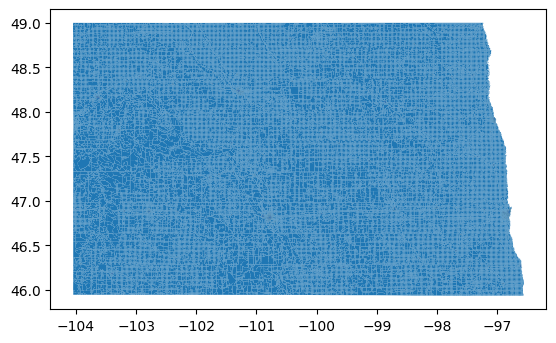

In [42]:
population_df.to_crs(epsg=4269).plot()

Let's also plot the population of each district to make sure they are all close to each other:

In [43]:
for plan in plans:
    print(f"For plan: {plan}")
    pop_vals = [population_df.loc[population_df[plan] == dist, "TOTPOP"].sum() for dist in population_df[plan].unique()]
    print(pop_vals)
    print()

For plan: SLDU_2021
[16158, 17275, 16469, 16307, 15796, 15831, 16264, 15749, 17308, 16467, 17231, 15749, 15976, 16299, 15938, 17291, 17189, 17259, 17126, 16556, 16067, 17129, 17326, 17385, 16196, 15992, 17092, 15845, 16598, 16424, 16814, 16992, 16178, 17007, 16615, 16671, 16660, 16684, 16790, 16990, 17215, 17186, 16045, 15881, 16523, 16022, 16529]

For plan: SLDU_2024
[17344, 17275, 16469, 16307, 15796, 15831, 16259, 15749, 17308, 16467, 17231, 15749, 15976, 16299, 15938, 17291, 16170, 17259, 17126, 16556, 16067, 17326, 17385, 16967, 16196, 15992, 17092, 15845, 16598, 16424, 16814, 16992, 16178, 17007, 16615, 16671, 16660, 16684, 16790, 16990, 17215, 17186, 16045, 15881, 16523, 16022, 16529]

For plan: SLDL_2021
[8268, 17275, 8119, 16307, 15796, 7890, 15831, 16264, 15749, 17308, 16467, 17231, 15749, 15976, 16299, 8350, 15938, 17291, 17189, 17259, 17126, 16556, 16067, 17129, 17326, 17385, 16196, 15992, 17092, 15845, 16598, 16424, 16814, 16992, 16178, 17007, 16615, 16671, 16660, 16684, 1

Finally, after everything is checked and no problems were found, let's save the shapefile for ND:

In [44]:
population_df.to_file("./ND/ND.shp")

shp_file = gpd.read_file('./ND/ND.shp')

shp_file.to_file('./ND/ND.geojson', driver='GeoJSON')